# Data Visualization

Data visualization plan using real examples based on the given data.



## What to Visualize

Each data column (feature) is a subject of visualization. Some features are interesting as is, others interesting in conjunction with another features.


## Plan

Using our data we can derive **six** kinds of plots. Using Google Analytics analogy they have different _kinds_ of metrics such as "Audience", "Behavior", or "Real-Time". Therefore each kind of plots is actually a grouped charts under one particular metric.

Here is a list of these groups:

* [Geographical Charts](#Geographical-Charts)
* [Content Charts](#Content-Charts)
* [User Activity Charts](#User-Activity-Charts)
* [Client Charts](#Client-Charts)
* [Hardware Charts](#Hardware-Charts)
* [Time Based Charts](#Time-Based-Charts)


Each kind will be described here in short, and free to scroll notebook down for charts examples based on real (your) data.

> #### Note:
> Each kind / group is a subject for extension. Groups also can be mixed. For example Hardware Charts also may have Time Based Charts if needed. This is just a general guideline.

### Geographical Charts

* [Users by Country](#Users-by-Country)
* [Users in Cities by Country](#Users-in-Cities-by-Country)
* [Political Map](#Political-Map)


### Content Charts

* [Total Content Distribution](#Total-Content-Distribution)
* [Top Content](#Top-Content)
* [Content Popularity Based on Geography](#Content-Popularity-Based-on-Geography)


### User Activity Charts

* [General User Activity](#General-User-Activity)
* [Detailed Activity](#Detailed-Activity)


### Client Charts

* [Client Distribution](#Client-Distribution)
* [CMS](#CMS)
* [CRM](#CRM)


### Hardware Charts

* [UI Overview](#UI-Overview)
* [UI Detalization](#UI-Detalization)
* [Device Overview](#Device-Overview)
* [Device Dispersion Based on Country](#Device-Dispersion-Based-on-Country)
* [Speed and Latency](#Speed-and-Latency)


### Time Based Charts

* [Audience by Hours](#Audience-by-Hours)
* [Time Line of a Particular Channel](#Time-Line-of-a-Particular-Channel)

In [1]:
# Data tools
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 8)

# Data Transformation

This section is about data transformation and you can feel free to skip to the next section
beacause this section contains no planning information. However, all code here is also
documented so that anyone can conceptually understand whats going on.

In [2]:
# Load data into `pandas` from .csv files
report_action = pd.read_csv('data/report_action.csv')
report = pd.read_csv('data/report.csv')

In [3]:
# Convert `start` and `end` fields into timestaps
report_action['start'] = report_action['start'].apply(lambda x: int(x / 1000))
report_action['end']   = report_action['end'].apply(lambda x: int(x / 1000))

### Common Table

Common table is a join table over `report_id` field.

In [4]:
common = pd.merge(report_action, report, on='report_id', how='inner')

It contains data from `report` and `report_action` together based on `report_id` field. This data format is needed
for further visualizations.

In [5]:
common.head()

,action_id,report_id,type,name,id,start,end,user_id,date,device,ui,version,client,cms,crm,city,state,country,network_speed,network_latency
0,1001,16,watching channel,STAR PLUS IND,5,1510290000,1510290000,1000602,1510264800,_TelergyHD_Android [thd603qc],Honua,v1.22.0,RegalHD,KOOI,KOOI01,MANUREWA,AUK,New Zealand,0.0,0.0
1,1002,16,watching channel,STAR PLUS EU,6,1510290000,1510290000,1000602,1510264800,_TelergyHD_Android [thd603qc],Honua,v1.22.0,RegalHD,KOOI,KOOI01,MANUREWA,AUK,New Zealand,0.0,0.0
2,1003,16,watching channel,STAR UTSAV,7,1510290000,1510290000,1000602,1510264800,_TelergyHD_Android [thd603qc],Honua,v1.22.0,RegalHD,KOOI,KOOI01,MANUREWA,AUK,New Zealand,0.0,0.0
3,1004,16,watching channel,COLORS HD,8,1510290000,1510290000,1000602,1510264800,_TelergyHD_Android [thd603qc],Honua,v1.22.0,RegalHD,KOOI,KOOI01,MANUREWA,AUK,New Zealand,0.0,0.0
4,1005,16,watching channel,COLORS IND,9,1510290000,1510290000,1000602,1510264800,_TelergyHD_Android [thd603qc],Honua,v1.22.0,RegalHD,KOOI,KOOI01,MANUREWA,AUK,New Zealand,0.0,0.0


<br>

# Geographical Charts

---

In [6]:
# Helper functions
def plot_country_distibution(df):
    df['country'].value_counts().plot(kind='bar', title='Country Distribution')


def plot_city_distribution(df, country):
    df[df['country'] == country]['city'].value_counts().plot(kind='bar')

## Users by Country

Chart which shows user distribution by countries.

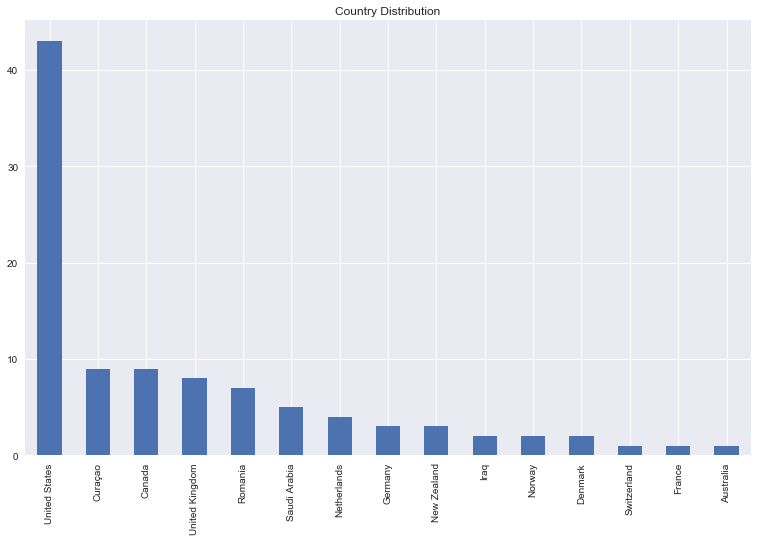

In [7]:
plot_country_distibution(report)

## Users in Cities by Country


Chart which shows user distribution by cities in some particular country.

It can be shown as a callback of clicking on above's chart bar. For example this chart
can be shown after clicking on `United States` bar.

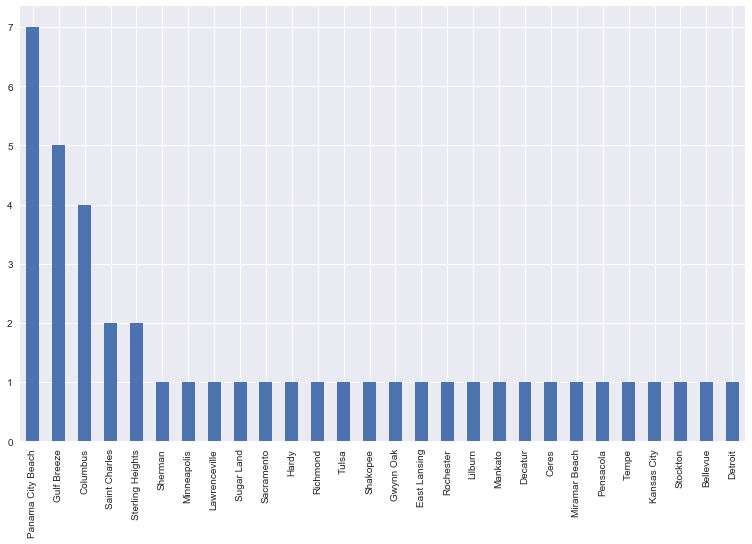

In [8]:
plot_city_distribution(report, 'United States')

Or click on `Canada`

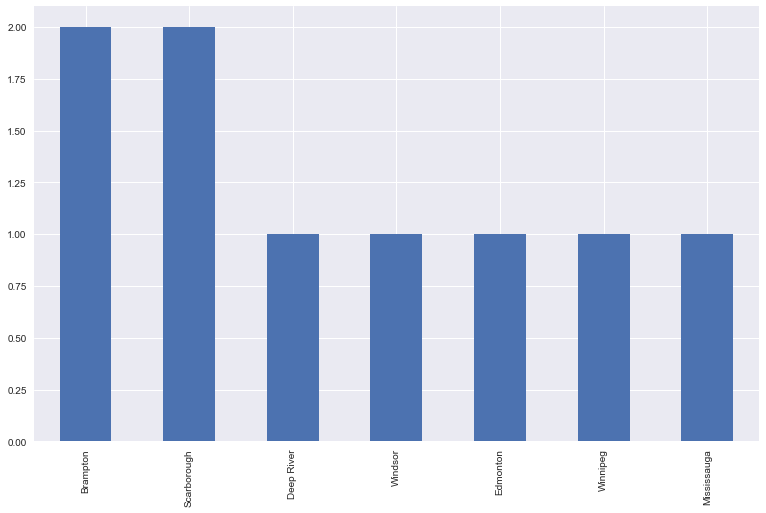

In [9]:
plot_city_distribution(report, 'Canada')

## Political Map

World map is always a good idea to have because first of all it is quite self explanatory and secondly, it can be reused as many times as needed in various metrics.

Interactive version (ugly looking one, but it serves its purpose):

http://www.openheatmap.com/view.html?map=AppropriationsMesocolonsHyperstimulate

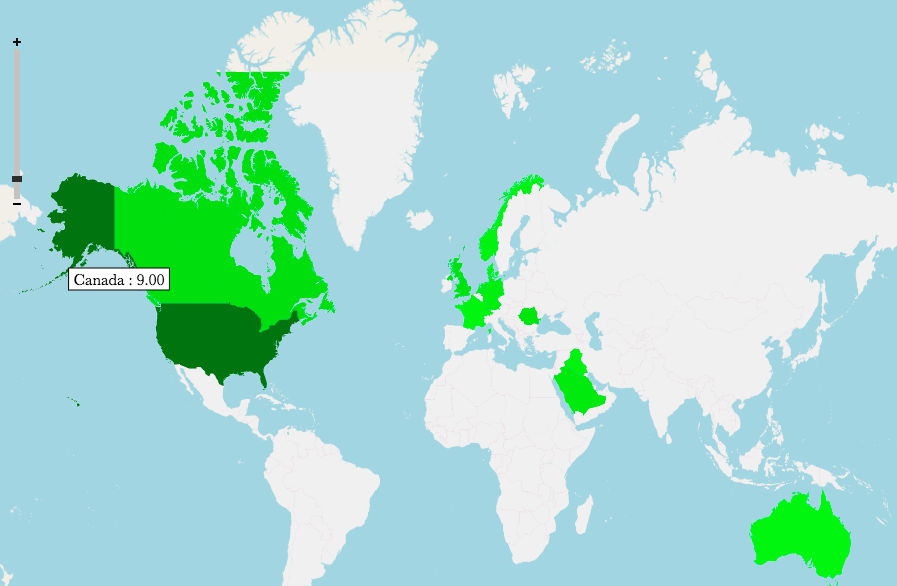

<br>


# Content Charts

---


Bar chart looks not great with scientific plots, however it may look quite interesting using
animated charts. This chart can show superiority of some content and show general content distribution.

## Total Content Distribution

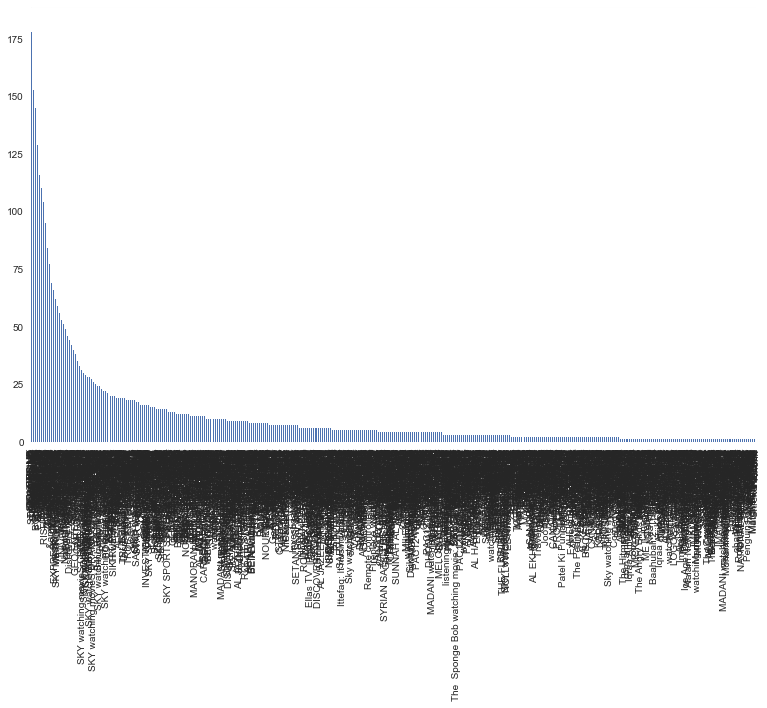

In [10]:
report_action['name'].value_counts().plot('bar')

Due to content diversity it is a good idea to apply some filters on it.

For example we can see only most popular channels:

## Top Content

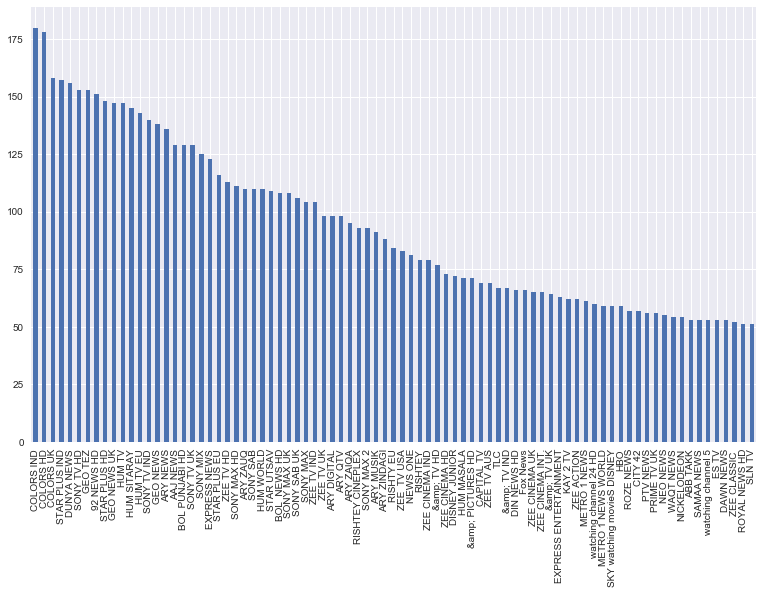

In [11]:
less = report_action['name'].value_counts()
less = less[less > 50]
less.plot('bar')

## Content Popularity Based on Geography

Popular content in United States

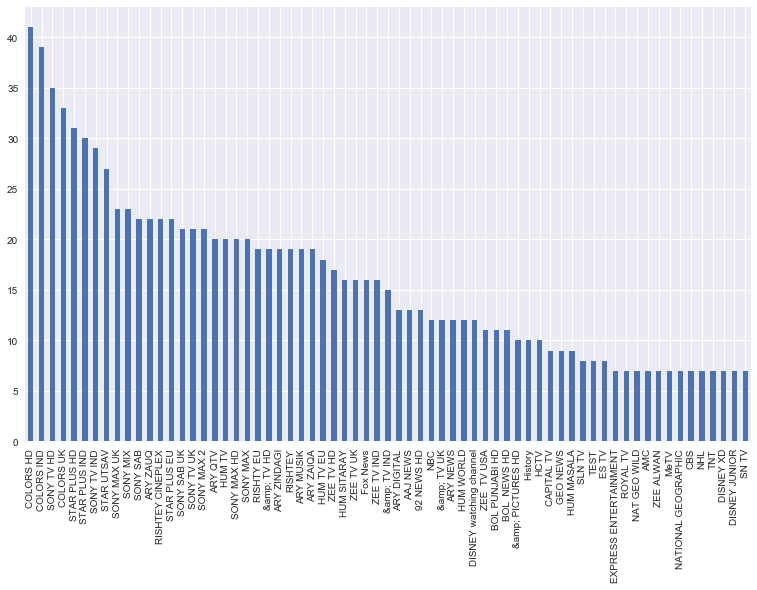

In [12]:
us_content = common[common['country'] == 'United States']['name'].value_counts()
us_content = us_content[us_content > us_content.mean() * 2]
us_content.plot('bar')

Popular content in United Kingdom

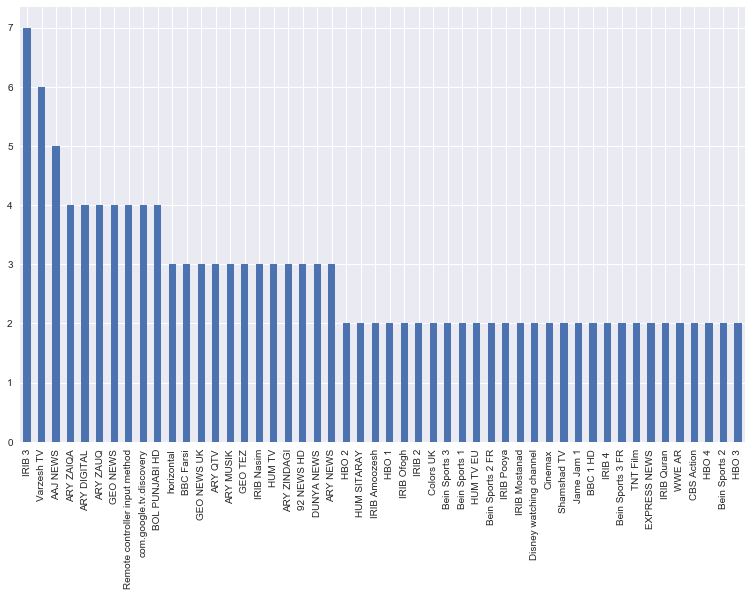

In [13]:
uk_content = common[common['country'] == 'United Kingdom']['name'].value_counts()
uk_content = uk_content[uk_content > uk_content.mean()]
uk_content.plot('bar')

<br>


# User Activity Charts

---

What users are doing.

## General User Activity

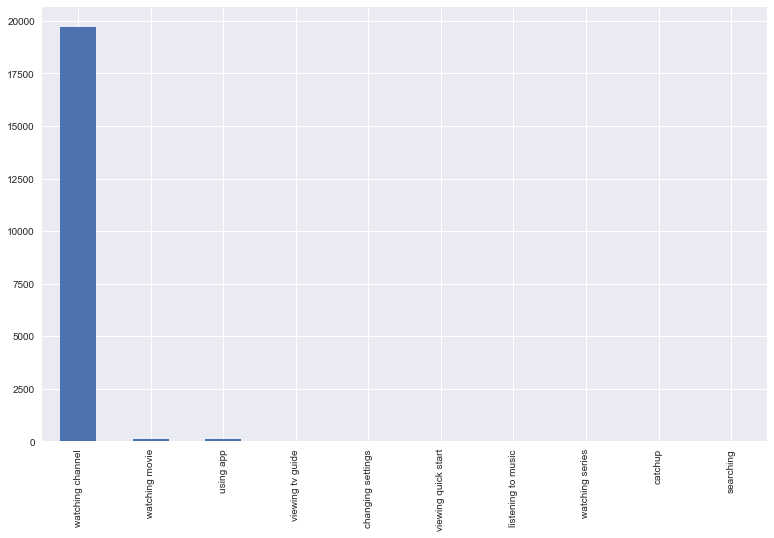

In [14]:
report_action['type'].value_counts().plot('bar')

## Detailed Activity

`watching channel` activity is dominant, therefore let's exclude it to see what people
are doing besides it:

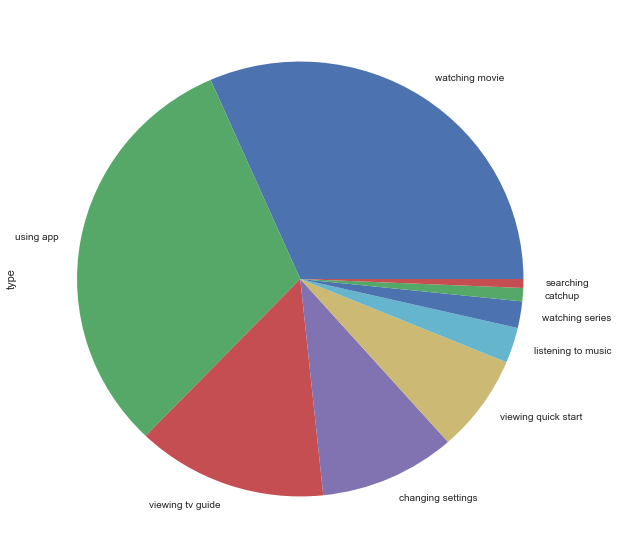

In [15]:
without_watching = report_action[report_action['type'] != 'watching channel']
without_watching['type'].value_counts().plot('pie', figsize=(10, 10))

<br>


# Client Charts

---



## Client Distribution

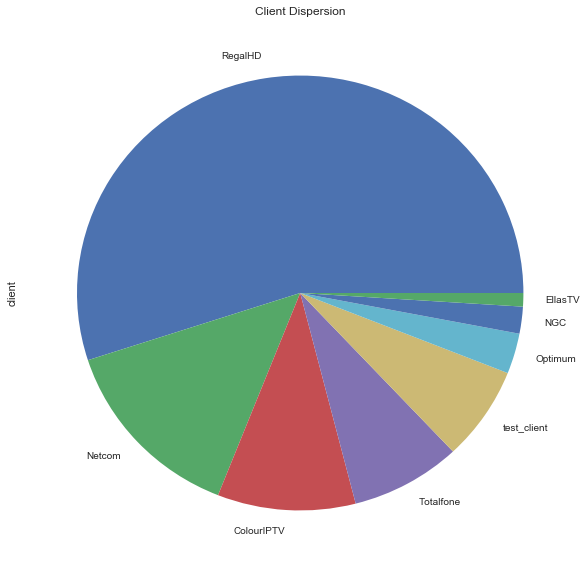

In [16]:
report['client'].value_counts().plot('pie', figsize=(10, 10), title='Client Dispersion')

## CMS

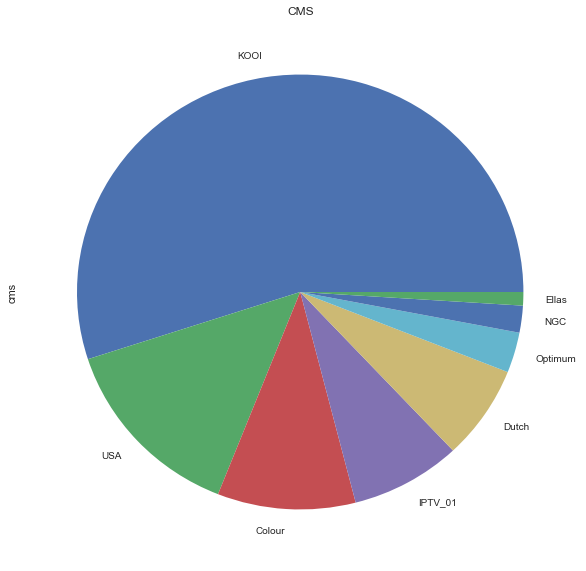

In [17]:
report['cms'].value_counts().plot('pie', figsize=(10, 10), title='CMS')

## CRM

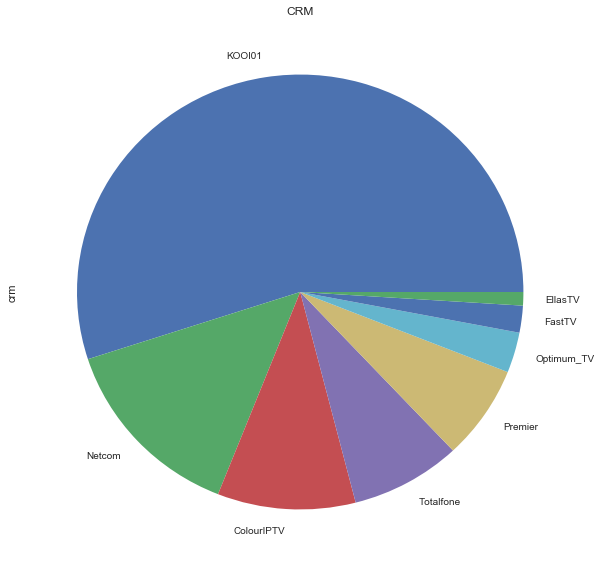

In [18]:
report['crm'].value_counts().plot('pie', figsize=(10, 10), title='CRM')

<br>


# Hardware Charts

---

Hardware charts are used for monitoring of various details about costumer hardware, versions, etc.


In [19]:
report.head()

,report_id,user_id,date,device,ui,version,client,cms,crm,city,state,country,network_speed,network_latency
0,1,100000013,1509919200,_WebTV [local],Akua,v1.21.421,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
1,2,100000013,1510005600,_WebTV [local],Akua,v1.21.429,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
2,3,100000012,1510005600,_TelergyHD_Linux [thd503],Honua,v1.21.432,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
3,4,100000013,1510092000,_WebTV [local],Akua,v1.21.922,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
4,5,100000012,1510092000,_TelergyHD_Android [thd709qc],Akua,v1.21.923,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0


## UI Overview

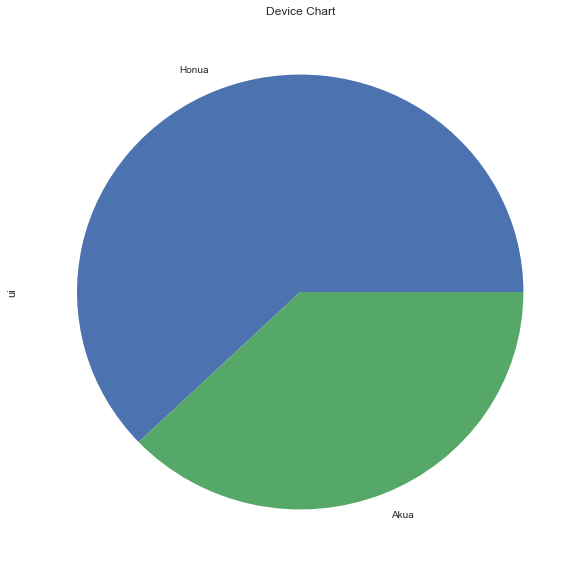

In [20]:
report['ui'].value_counts().plot(
    'pie',
    figsize=(10, 10),
    title='Device Chart')

## UI Detalization

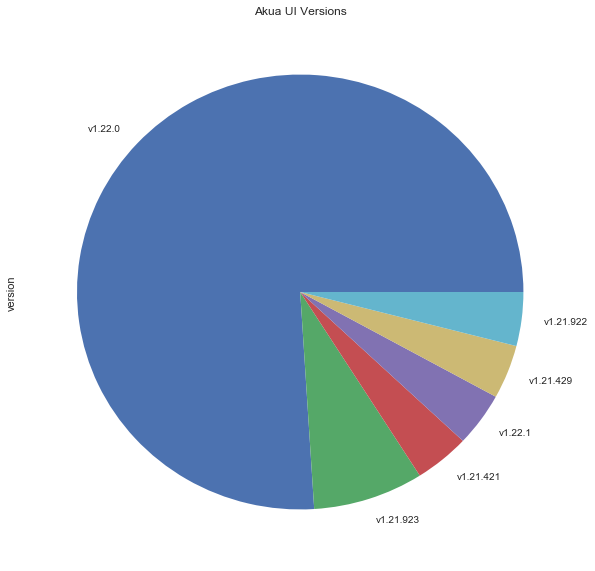

In [21]:
report[report['ui'] == 'Akua']['version'].value_counts().plot(
    'pie',
    figsize=(10, 10),
    title='Akua UI Versions')

## Device Overview

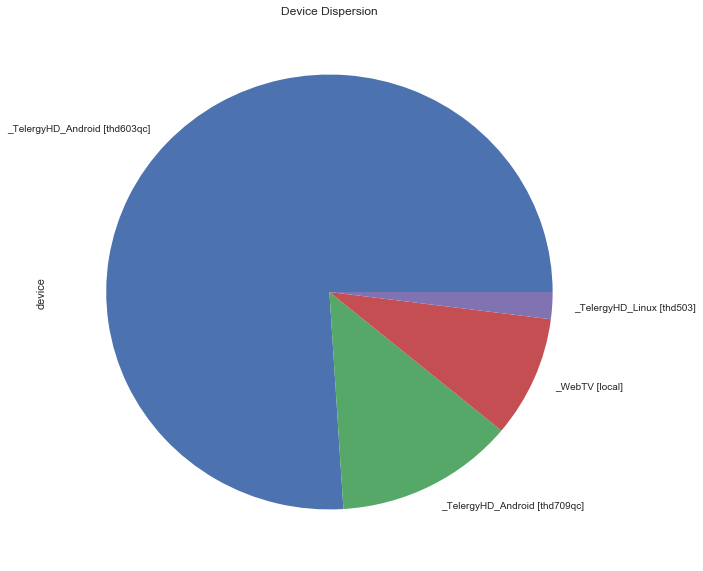

In [22]:
report['device'].value_counts().plot('pie', figsize=(10, 10), title='Device Dispersion')

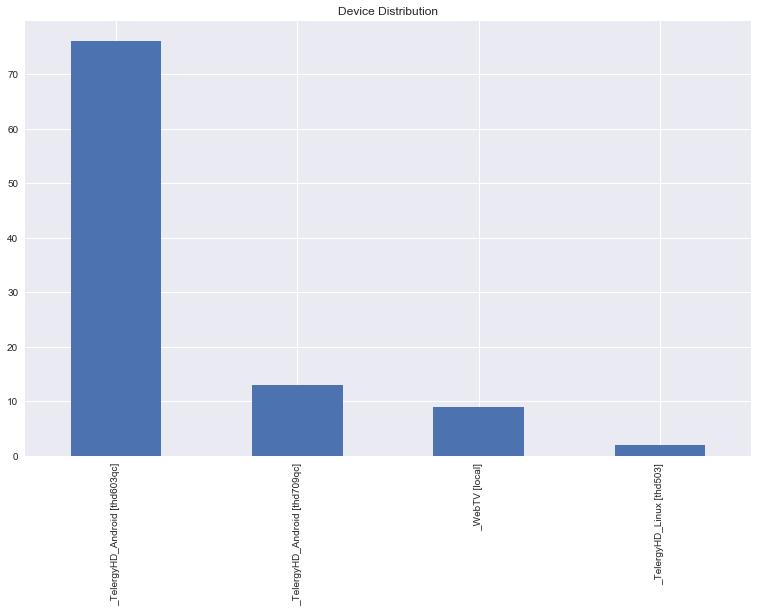

In [23]:
report['device'].value_counts().plot('bar', title='Device Distribution')

## Device Dispersion Based on Country

This is also an important metrics to see what device is used where.

For example in United States people arent using Linux client at all.

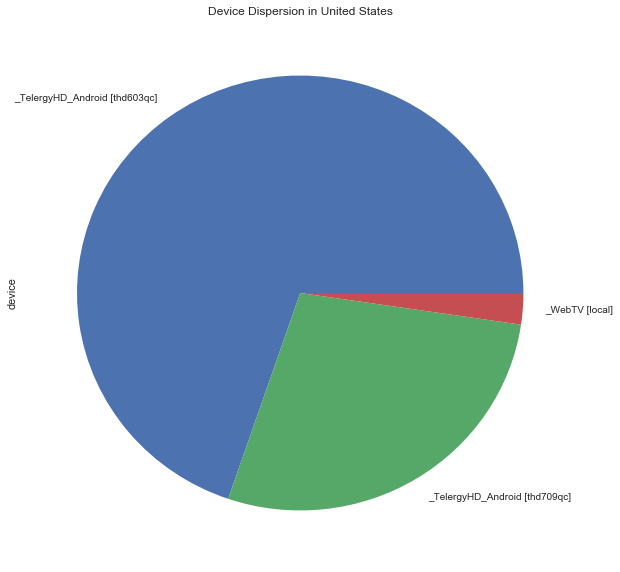

In [24]:
report[report['country'] == 'United States']['device'].value_counts().plot('pie', title='Device Dispersion in United States', figsize=(10, 10))

In [25]:
report.head()

,report_id,user_id,date,device,ui,version,client,cms,crm,city,state,country,network_speed,network_latency
0,1,100000013,1509919200,_WebTV [local],Akua,v1.21.421,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
1,2,100000013,1510005600,_WebTV [local],Akua,v1.21.429,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
2,3,100000012,1510005600,_TelergyHD_Linux [thd503],Honua,v1.21.432,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
3,4,100000013,1510092000,_WebTV [local],Akua,v1.21.922,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0
4,5,100000012,1510092000,_TelergyHD_Android [thd709qc],Akua,v1.21.923,test_client,Dutch,Premier,Târgu Mureş,MS,Romania,0.0,0.0


## Speed and Latency

While current data has no data considering these two features, they are important part
of hardware kind of information.

These two can be represented either as scatter plot or line plot.

Imagine such a plot where `x` axis represents a time `y` axis represents latency. Plot can show _maximum_, _minimum_, and _mean_ latency values over various clients.

For example

* min, max, mean over clients in US
* min, max, mean over all clients
* min, max, mean over Europe

etc

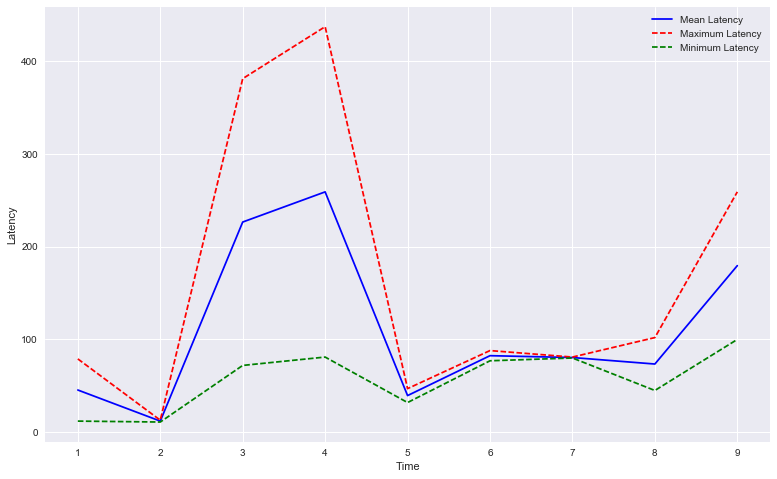

In [26]:
max_latency = [79, 13, 381, 437, 47, 88, 81, 102, 259]
min_latency = [12, 11, 72, 81, 32, 77, 80, 45, 100]
mean_latency = [(x+y)/2 for x,y in zip(*[max_latency, min_latency])]
time_point = list(range(1, (len(mean_latency)) + 1))

plt.plot(time_point, mean_latency, 'b', label='Mean Latency')
plt.plot(time_point, max_latency, 'r--', label='Maximum Latency')
plt.plot(time_point, min_latency, 'g--', label='Minimum Latency')
plt.xlabel('Time')
plt.ylabel('Latency')
plt.legend()
plt.show()

<br>

## Time Series

---

Time series is a kind of chart where one of the axis (usually x) stands for some time point. Time series charts works best with some soft real time data.

In [27]:
cs = common.sort_values(by='start', ascending=0)

In [28]:
import datetime as dt

# Range of one day
start_time = 1510269000
end_time   = 1510350000

# Cut dataframe
ts = cs[cs['start'] > 1510269000]

In [29]:
def to_hour(timestamp):
    return dt.datetime.fromtimestamp(timestamp).replace(tzinfo=dt.timezone.utc).hour

def vectorize(vec):
    hour = np.zeros(vec.shape)
    
    for index, value in enumerate(vec):
        hour[index] = to_hour(value)
    
    return hour

In [30]:
hours = vectorize(ts.start.values)
ts['hour'] = hours.astype(int)
hours_x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Audience by Hours

How many people are watching things during what hour.

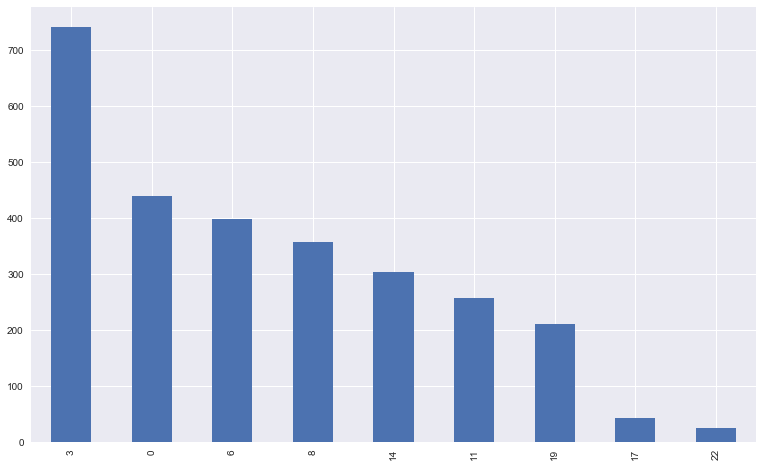

In [31]:
ts['hour'].value_counts().plot('bar')

In [32]:
# Time line of Colors HD / IND / UK in United States

us         = ts[ts['country'] == 'United States']
colors_hd  = ts[ts['name']    == 'COLORS HD']
colors_ind = ts[ts['name']    == 'COLORS IND']
colors_uk  = ts[ts['name']    == 'COLORS UK']

colors_hd  = colors_hd['hour'].value_counts()
colors_ind = colors_ind['hour'].value_counts()
colors_uk  = colors_uk['hour'].value_counts()

In [33]:
def make_time_series(data):
    time_series = np.zeros((24,)).astype(int)
    for i, n in data.iteritems():
        time_series[i] = n
    
    return time_series

## Time Line of a Particular Channel

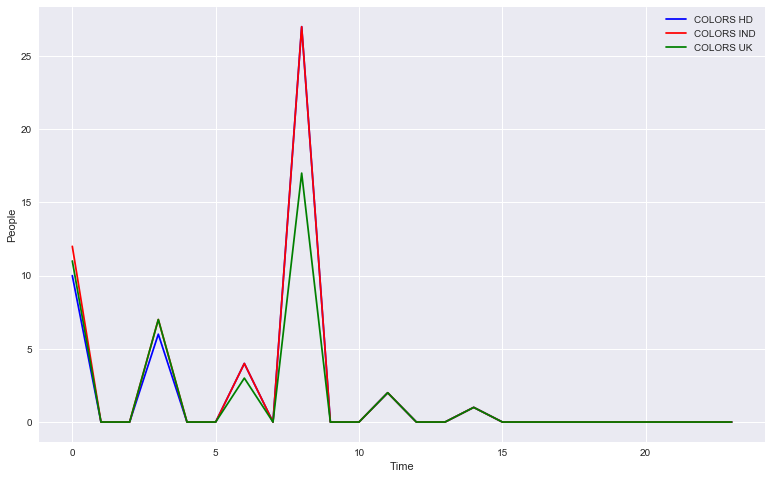

In [34]:
colors_hd  = make_time_series(colors_hd)
colors_ind = make_time_series(colors_ind)
colors_uk  = make_time_series(colors_uk)

plt.plot(hours_x, colors_hd, 'b', label='COLORS HD')
plt.plot(hours_x, colors_ind, 'r', label='COLORS IND')
plt.plot(hours_x, colors_uk, 'g', label='COLORS UK')
plt.xlabel('Time')
plt.ylabel('People')
plt.legend()
plt.show()